### 협업일지
#### 일자 : 2025-04-25 / 박하진

#### 오늘 할 일
- 코호트 분석 마저 진행하기
- 
-

#### 오늘 한 일
-
-

#### 내일 할 일
-
-
-

#### Codes

#### Issues & Challenges
-
-
-

#### Reflection

코호트 분석 결과

## 유입 Cohort 분석

Cohort 분석을 통해 **월별 가입자의 잔존율** 확인, 어떤 시점에 유입된 사용자들이 더 오래 남아 있었는지, 혹은 빠르게 이탈했는지를 파악

## Cohort 분석 준비

우선 `accounts_user` 테이블에서 **가입일**과 **활동일** 데이터 활용

- `joined_at` : 사용자의 가입 일자
- `activity_date` : 사용자의 실제 활동 일자 (질문 열람, 응답, 신고 등에서 파생 가능)

## Cohort 분석을 위한 테이블 매핑

| 분석용 컬럼 | 출처 테이블 | 컬럼명 | 설명 |
| --- | --- | --- | --- |
| **가입일** (Cohort 기준) | `accounts_user` | `created_at` | 사용자 최초 가입일 |
| **활동일** (잔존 판단 기준) | `accounts_userquestionrecord` | `created_at` | 사용자가 투표에 참여한 시점 (서비스 내 실질적 활동) |

## 분석 흐름 요약

1. `accounts_user`에서 사용자별 **가입 월**을 계산 → `cohort_month`
2. `accounts_userquestionrecord`에서 사용자별 **활동 월**을 계산 → `activity_month`
3. 가입 월과 활동 월의 차이를 계산해서 → `cohort_index`
4. `cohort_month` 기준으로 `cohort_index`에 따른 사용자 수 카운팅
5. Heatmap 형태로 시각화

시각화 및 해석

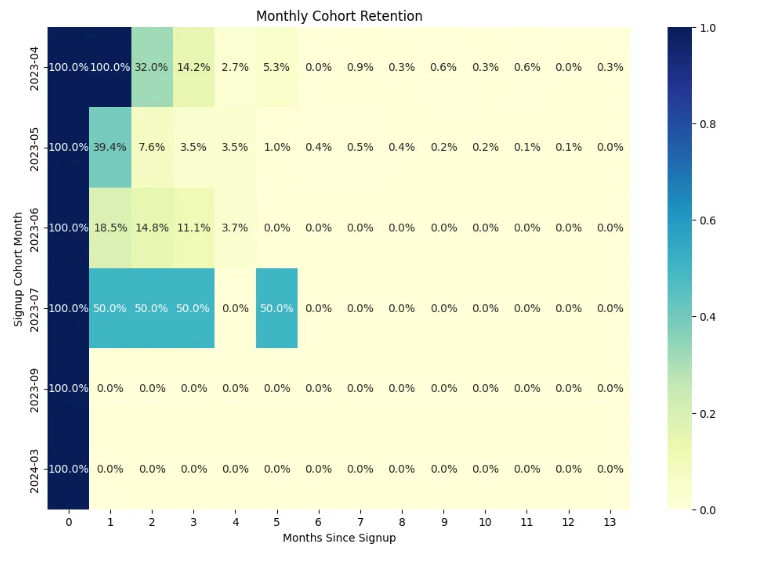

### **숫자의 의미**

각 셀에 있는 숫자는 **해당 cohort의 가입자 중 몇 %가 해당 월에도 활동했는지**를 나타냄

### 2023-04 cohort

- `cohort_index = 0`: **1.0 (100%)**
    - → 2023년 4월에 가입한 사용자 중, 4월에 활동한 사용자비율은 100%
- `cohort_index = 1`: **1.0 (100%)**
    - → 가입한 다음 달(5월)에도 활동한 비율이 100%
- `cohort_index = 2`: **0.3195**
    - → 가입 2개월 뒤인 6월에는 약 **32%**가 활동
- `cohort_index = 3`: **0.142**
    - → 가입 3개월 뒤에는 **14.2%**
- 이후는 점점 감소 (장기 잔존율은 낮음)

### 2023-05 cohort

- `cohort_index = 0`: 1.0 (5월 활동자 전부)
- `cohort_index = 1`: 0.3935 → 39.4%
- `cohort_index = 2`: 0.0756 → 7.6%
- `cohort_index = 3`: 0.0353 → 3.5%
- 이후 계속 감소

### 3. **해석 요약**

- **2023-04 cohort는 비정상적으로 높은 2개월차 retention이 있었다가 빠르게 감소**
    
    → `1.0 → 1.0 → 0.32 → 0.14 ...`
    
- **2023-05 cohort 이후부터는 점점 retention이 낮아짐**
    
    → 즉, 서비스 지속 사용률이 점점 떨어지고 있음
    
- **2023-06, 07, 09, 24-03 cohort 등도 마찬가지로 단기 이탈 심함**